In [1]:
#Please Run all cells in order and one by one to use each interactive plot separately.

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
#code in this cell is from https://mljar.com/blog/jupyter-notebook-hide-code/

# Parabolic wave function in a potential box.

This notebook's purpose is to visualize, exemplify and expand the results of the additional exercise 4.3:

4.3 - Let us consider a particle in a box, $−a < x < a$, whose wave function is $Ψ(x, 0) = N(a^2−x^2)$.
a) Find $N$.    
b) Express $Ψ(x, 0)$ as a superposition of eigenfunctions of the Hamiltonian.    
c) Compute the expectation values of $E$ and $x^2$.    
d) Find the uncertainty in the energy, ∆E.    

The potential function in this problem is the same as in an infinite potential well.

$$\begin{align}
    V(x)=
    \begin{cases}
       \infty & \text{if}\ x<-a    \\
       0 & \text{if}\ a<x<a  \\
       \infty & \text{if}\ a<x    \\
    \end{cases}
\end{align}$$

We can solve a) normalizing the parabolic wave function. As N has an arbitary complex phase, we calculate the real and positive N solution.

$$
\int^a_{-a} |\Psi(x,0)|^2 dx = 1 \hspace{0.5cm} \implies \hspace{0.5cm} \int^a_{-a} |N^2 (a^2-x^2)|^2 dx = \frac{16}{15}a^5 N^2 = 1 \hspace{0.5cm} \implies \hspace{0.5cm} N = \frac{15^{\frac{1}{2}}}{4a^{\frac{5}{2}}}
$$

Using Schrödinger's equation, we can find the eigenfunctions and energy eigenvalues in this system to solve b):

$$
\Phi_n(x) = \frac{1}{\sqrt{a}} \sin\left( n\pi\frac{x+a}{2a} \right) \hspace{1.5cm} E_n = \frac{n^2\pi^2ħ^2}{8 m a^2}
$$

Then, we can express $Ψ(x, 0)$ as a superposition of eigenfunctions of the Hamiltonian and use this to calculate $Ψ(x, t)$.

$$
\Psi(x, t) = \sum_{n=1}^\infty a_n e^{-i \frac{E_n}{ħ} t} \Phi_n(x) \hspace{1.5cm} a_n = \int^a_{-a} \Phi_n^* \ \Psi dx = \frac{2\sqrt{15}}{n^3\pi^3}(2-2\cos(n\pi)-n\pi\sin(n\pi)) = \frac{4\sqrt{15}}{n^3\pi^3} \left(1 - (-1)^n \right)
$$

Finally, c) and d) can be calculated using the previous results:

$$
⟨E⟩ = \sum_{n=1}^\infty |a_n|^2 E_n \hspace{1.5cm} ⟨E^2⟩ = \sum_{n=1}^\infty |a_n|^2 E_n^2 \hspace{1.5cm} \Delta E = \sqrt{⟨E^2⟩-⟨E⟩^2}
$$

$$
⟨x^2⟩ = \int^a_{-a} x^2 |\Psi(x,t)|^2 dx
$$

## 2D representation of $|ψ(x,t)|^2$
In the following figure we can see the evolution of the probability density function.

<IPython.core.display.Javascript object>


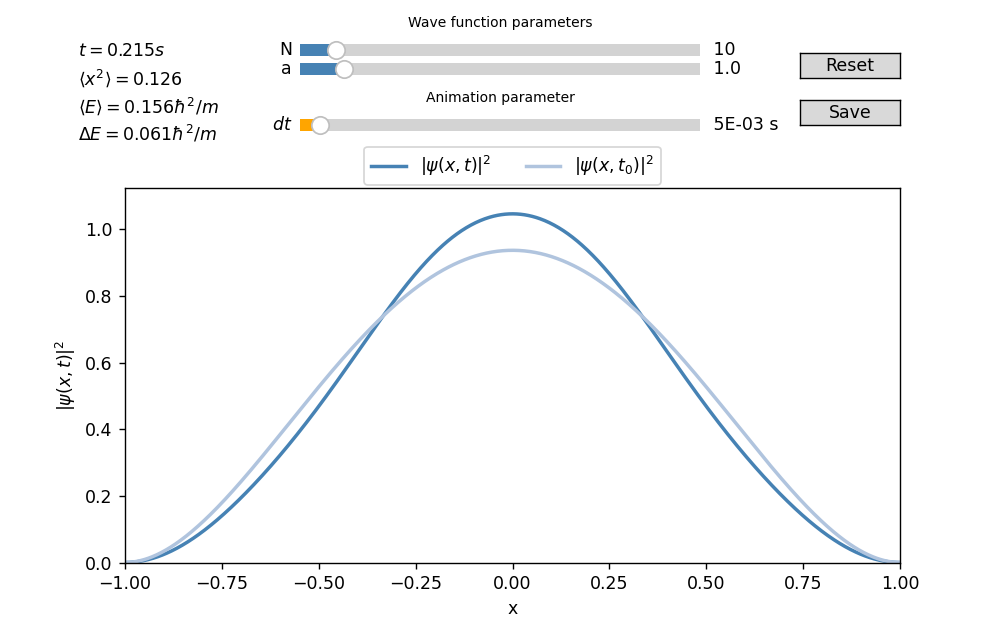

In [1]:
import numpy as np
from numpy import pi, sin, cos, exp
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

#We activate the interactive mode in order to display animations
%matplotlib notebook

#We define the time dependent wave function
def Psi1(X,t):
    Psi1 = 2*15**(1/2)/pi**3 * sum((2-2*cos(n*pi)-n*pi*sin(pi*n))/n**3 * \
                                   exp(-I*(n*pi/a)**2*t/8) * sin(n*pi*(X+a)/(2*a))/a**(1/2) for n in range(1,N+1))
    return Psi1

#Program constants
I = complex(0,1)


# -----------------------------------------------------------------------------------------------

def find_lims(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of Y
    ymax = np.max(Y)
    ymin = np.min(Y)
    
    if(ymax >= 0 and ymin >= 0):
        lim_inf, lim_sup = ymin*0.8, ymax*1.2
    elif(ymax > 0 and ymin < 0):
        lim_inf, lim_sup = ymin*1.2, ymax*1.2
    elif(ymax < 0 and ymin < 0):
        lim_inf, lim_sup = ymin*1.2, ymax*0.8
    
    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def animate_interactive_rhox_2D(Psi,t0,total_frames):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have n,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------

    #We define some wrapped functions to have a better program structure 
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_N = fig.add_axes([0.3, 0.90, 0.4, 0.04])
        ax_N.set_title('Wave function parameters',fontsize=8)
        ax_a = fig.add_axes([0.3, 0.87, 0.4, 0.04])
        
        ax_dt = fig.add_axes([0.3, 0.78, 0.4, 0.04])
        ax_dt.set_title('Animation parameter',fontsize=8)
        
        #We create the sliders as widgets
        s_N = Slider(ax=ax_N, label='N', valmin=1, valmax=100, valinit=N, valstep = 1, valfmt=' %0.0f',facecolor='steelblue')
        s_a = Slider(ax=ax_a, label='a', valmin=0.5, valmax=5, valinit=a, valfmt=' %1.1f ', facecolor='steelblue')
        s_dt = Slider(ax=ax_dt,label='$dt$',valmin=0.0001,valmax=0.1,valinit=dt,valfmt=' %.E s',facecolor='orange')    
        
        #We return all axes and sliders created in the function
        return ax_N, ax_a, ax_dt, s_N, s_a, s_dt
    
    def make_annotations(actualize=False):
    #This function defines and specifies the details of the annotations needed in this interactive plot
    #Any details referring the definition and graphic details of the annotations must be changed inside this function

    #We define the annotations as global in order to be able to define and actualize the annotations in the same function.
        global time_annotation, x2_annotation, E_annotation, DE_annotation
        
        
        E = sum( (2*15**(1/2)/pi**3*(2-2*cos(n*pi)-n*pi*sin(pi*n))/n**3)**2 * (n*pi/(8*a))**2 for n in range(1,N+1))
        DE = np.sqrt(sum( (2*15**(1/2)/pi**3*(2-2*cos(n*pi)-n*pi*sin(pi*n))/n**3)**2 * (n*pi/(8*a))**4 for n in range(1,N+1)) - E**2)
        
        X = np.linspace(x0,xf,1000)
        x2 = sum(X**2*np.abs(Psi(X,t))**2)*(X[1]-X[0])
        
        if (actualize==False):
            time_annotation = ax.annotate("$t = {:10.3f} s $".format(t), xy=(-0.06, 1.35), xycoords="axes fraction")
            x2_annotation=ax.annotate("$⟨x^2⟩ = {:10.3f} $".format(x2), xy=(-0.06, 1.275), xycoords="axes fraction")
            E_annotation = ax.annotate("$⟨E⟩ = {:10.3f} ħ^2/m $".format(E), xy=(-0.06, 1.200), xycoords="axes fraction")
            DE_annotation = ax.annotate("$ΔE = {:10.3f} ħ^2/m $".format(DE), xy=(-0.06, 1.125), xycoords="axes fraction")
        if (actualize==True):
            E_annotation.set_text("$⟨E⟩ = {:10.3f} ħ^2/m $".format(E))
            DE_annotation.set_text("$ΔE = {:10.3f} ħ^2/m $".format(DE))
        
        #We return all annotations created in the function
        return time_annotation, x2_annotation, E_annotation, DE_annotation
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.8,0.875,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')
        
        def reset(event):
        #Resets all sliders and time
            global t
            s_N.reset()
            s_a.reset()
            s_dt.reset()
            t = t0
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.8,0.80,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            anim.save('Parabolic_wavefun_animated_rhox.gif',PillowWriter(fps=20),dpi=100)
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_save
        
        
    def initialize_anim():
#   Function used to initialize the animation figure (Format and graphic details)
#       We restart the time
        global t
        t = t0
        
#       We add some graphic details
        ax.set_xlabel('x')
        ax.set_ylabel('$|ψ(x,t)|^2$')
        ax.legend(bbox_to_anchor=(0., 1.03, 1.,.102),loc = 'upper center',ncol=2)
        ax.axhline(y = 0,color = 'black',linestyle = '--',lw = 0.5)
        
#       We compute the initial information
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t0)
        
#       We use the initial function limits
        ymin, ymax = find_lims(np.abs(Y)**2)
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
#       We represent both functions
        line1.set_data(X, np.abs(Y)**2)
        line2.set_data(X, 15/(16*a**5)*(a**2-X**2)**2) 
    
        #We return all line functions
        return line1, line2
    

    def animate(frame_num):
#   Function we iterate to generate each frame
#       We compute all needed variables each frame
        global t,X,Y
        t = t + dt
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t)

#       We actualize the time and x2 annotations
        time_annotation.set_text("$t = {:10.3f} s $".format(t))
        x2 = sum(X**2*np.abs(Psi(X,t))**2)*(X[1]-X[0])        
        x2_annotation.set_text("$⟨x^2⟩ = {:10.3f} $".format(x2))

#       We represent both functions
        line1.set_data(X, np.abs(Y)**2)
        line2.set_data(X, 15/(16*a**5)*(a**2-X**2)**2) 
        
        #We return all line functions
        return line1, line2
    
    
    def update(val):
    #Function used to update the figure when sliders are used
        #We update each global parameter in the wave function
        global N,a,x0,xf,ymin,ymax,dt
        N = round(s_N.val)
        a = s_a.val
        dt = s_dt.val
        
        x0 = -a
        xf = a

        #We compute and apply the new limits in the main figure
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t0)
        ymin, ymax = find_lims(np.abs(Y)**2)
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
        #We actualize the annotations
        time_annotation, x2_annotation, E_annotation, DE_annotation = make_annotations(actualize=True)
        
        plt.show()
        return
    
    
        # ------------------------------------------------------------
    
    #Function's Main Program
    #We initialize wave function's variables
    global N,a,x0,xf,t,dt
    N = 10
    a = 1

    #We initialize figure's variables
    t = t0
    dt = 0.005
    x0 = -a
    xf = a
    
    #We define figure's axes and main line
    fig, ax = plt.subplots(figsize=(8,5),dpi=100)
    fig.subplots_adjust(bottom = 0.1, top = 0.70)
    line1, = ax.plot([], [], lw=2, label = '$|ψ(x,t)|^2$',color = 'steelblue')
    line2, = ax.plot([], [], lw=2, label = '$|ψ(x,t_0)|^2$',color = 'lightsteelblue')    
    
    #We create the animation with preset parameters
    anim = FuncAnimation(fig, animate, init_func=initialize_anim, frames = total_frames, interval = 50, blit=True)
    
    #We create the desired sliders
    ax_N, ax_a, ax_dt, s_N, s_a, s_dt = create_sliders()
    
    #We generate the two buttons
    b_reset, b_save = generate_buttons()   
    
    #We generate the annotations
    time_annotation, x2_annotation, E_annotation, DE_annotation = make_annotations()
    
    #We call the update function when any slider is used
    s_N.on_changed(update)
    s_a.on_changed(update)
    s_dt.on_changed(update)
    
    plt.show()
    #Although it might seem redundant to return the animation and buttons after showing them, referencing them 
    #  in the main program is needed for the interactive plot to work properly
    return anim, b_reset, b_save


# -----------------------------------------------------------------------------------------------

#We define the initial time and number of total frames
#A high total_frames value is discouraged if saving the animation is intended 
t0 = 0
total_frames = 300

anim, b_reset, b_save = animate_interactive_rhox_2D(Psi1,t0,total_frames)

## 2D representation of $ψ(x,t)$
In the following figure, the time dependent real and imaginary parts of the wave function are shown.

<IPython.core.display.Javascript object>


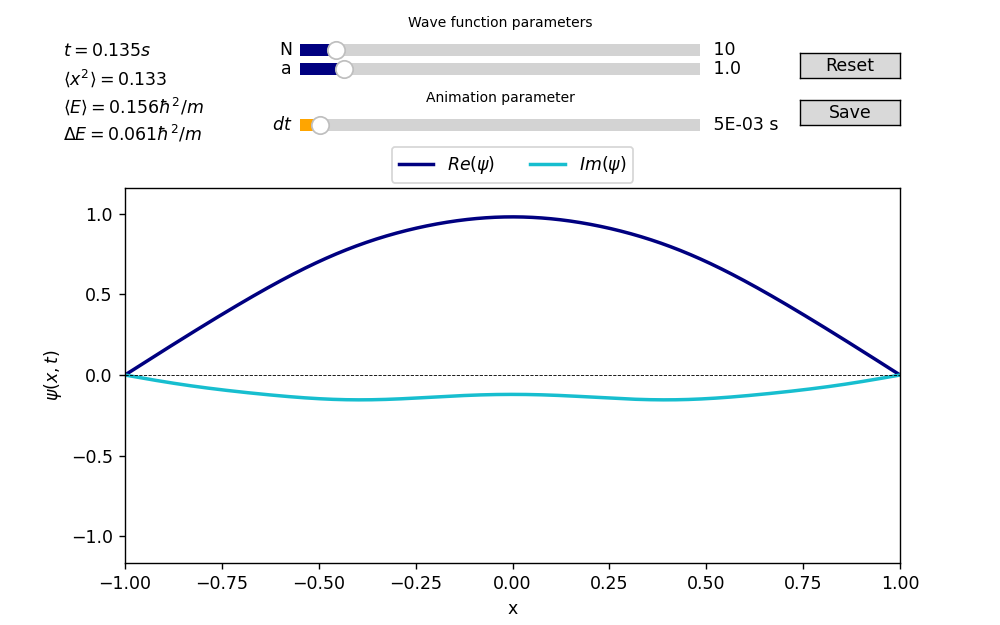

In [5]:
#We enable the interactive mode for the next plot
%matplotlib notebook

# -----------------------------------------------------------------------------------------------

def find_lims_abs(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of the imaginary and real part of Y (wavefunction array)
    ymax = np.max(Y)
    ymin = -ymax
    lim_inf, lim_sup = ymin*1.2, ymax*1.2

    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def animate_interactive_Psi_2D(Psi,t0,total_frames):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have n,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------

    #We define some wrapped functions to have a better program structure 
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_N = fig.add_axes([0.3, 0.90, 0.4, 0.04])
        ax_N.set_title('Wave function parameters',fontsize=8)
        ax_a = fig.add_axes([0.3, 0.87, 0.4, 0.04])
        
        ax_dt = fig.add_axes([0.3, 0.78, 0.4, 0.04])
        ax_dt.set_title('Animation parameter',fontsize=8)
        
        #We create the sliders as widgets
        s_N = Slider(ax=ax_N, label='N', valmin=1, valmax=100, valinit=N, valstep = 1, valfmt=' %0.0f',facecolor='navy')
        s_a = Slider(ax=ax_a, label='a', valmin=0.5, valmax=5, valinit=a, valfmt=' %1.1f ', facecolor='navy')
        s_dt = Slider(ax=ax_dt,label='$dt$',valmin=0.0001,valmax=0.1,valinit=dt,valfmt=' %.E s',facecolor='orange')    
        
        #We return all axes and sliders created in the function
        return ax_N, ax_a, ax_dt, s_N, s_a, s_dt
    
    def make_annotations(actualize=False):
    #This function defines and specifies the details of the annotations needed in this interactive plot
    #Any details referring the definition and graphic details of the annotations must be changed inside this function

    #We define the annotations as global in order to be able to define and actualize the annotations in the same function.
        global time_annotation, x2_annotation, E_annotation, DE_annotation
        
        E = sum( (2*15**(1/2)/pi**3*(2-2*cos(n*pi)-n*pi*sin(pi*n))/n**3)**2 * (n*pi/(8*a))**2 for n in range(1,N+1))
        DE = np.sqrt(sum( (2*15**(1/2)/pi**3*(2-2*cos(n*pi)-n*pi*sin(pi*n))/n**3)**2 * (n*pi/(8*a))**4 for n in range(1,N+1)) - E**2)
        
        X = np.linspace(x0,xf,1000)
        x2 = sum(X**2*np.abs(Psi(X,t))**2)*(X[1]-X[0])
        
        if (actualize==False):
            time_annotation = ax.annotate("$t = {:10.3f} s $".format(t), xy=(-0.08, 1.35), xycoords="axes fraction")
            x2_annotation=ax.annotate("$⟨x^2⟩ = {:10.3f} $".format(x2), xy=(-0.08, 1.275), xycoords="axes fraction")
            E_annotation = ax.annotate("$⟨E⟩ = {:10.3f} ħ^2/m $".format(E), xy=(-0.08, 1.200), xycoords="axes fraction")
            DE_annotation = ax.annotate("$ΔE = {:10.3f} ħ^2/m $".format(DE), xy=(-0.08, 1.125), xycoords="axes fraction")
        if (actualize==True):
            E_annotation.set_text("$⟨E⟩ = {:10.3f} ħ^2/m $".format(E))
            DE_annotation.set_text("$ΔE = {:10.3f} ħ^2/m $".format(DE))
        
        #We return all annotations created in the function
        return time_annotation, x2_annotation, E_annotation, DE_annotation
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.8,0.875,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')
        
        def reset(event):
        #Resets all sliders and time
            global t
            t = t0
            s_N.reset()
            s_a.reset()
            s_dt.reset()
            ax.view_init()
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.8,0.80,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            anim.save('Parabolic_wavefun_animated_rhox.gif',PillowWriter(fps=20),dpi=100)
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_save
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.8,0.85,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            anim.save('Parabolic_wavefun_animated_Psi_2D.gif',PillowWriter(fps=20),dpi=100)
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_save
        
        
    def initialize_anim():
#   Function used to initialize the animation figure (Format and graphic details)
#       We restart the time
        global t
        t = t0
        
#       We add some graphic details
        ax.set_xlabel('x')
        ax.set_ylabel('$ψ(x,t)$')
        ax.legend(bbox_to_anchor=(0., 1.03, 1.,.102),loc = 'upper center',ncol=2)
        ax.axhline(y = 0,color = 'black',linestyle = '--',lw = 0.5)
        
#       We compute the initial information
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t0)
        
#       We use the initial function limits
        ymin, ymax = find_lims_abs(np.abs(Y))
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
#       We represent both functions
        line1.set_data(X, np.real(Y))
        line2.set_data(X, np.imag(Y))  
        
        #We return all line functions
        return line1, line2
    

    def animate(frame_num):
#   Function we iterate to generate each frame
#       We compute all needed variables each frame
        global t,X,Y
        t = t + dt
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t)

#       We actualize the time and x2 annotations
        time_annotation.set_text("$t = {:10.3f} s $".format(t))
        x2 = sum(X**2*np.abs(Psi(X,t))**2)*(X[1]-X[0])        
        x2_annotation.set_text("$⟨x^2⟩ = {:10.3f} $".format(x2))

#       We represent both functions
        line1.set_data(X, np.real(Y))
        line2.set_data(X, np.imag(Y))      
        
        #We return all line functions
        return line1, line2
    
    
    def update(val):
    #Function used to update the figure when sliders are used
        #We update each global parameter in the wave function
        global N,k,a,x0,xf,ymin,ymax,dt
        N = round(s_N.val)
        a = s_a.val
        dt = s_dt.val
        
        x0 = -a
        xf = a

        #We compute and apply the new limits in the main figure
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t0)
        ymin, ymax = find_lims_abs(np.abs(Y))
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
        #We actualize the annotations
        time_annotation, x2_annotation, E_annotation, DE_annotation = make_annotations(actualize=True)
        
        plt.show()
        return
    
    
        # ------------------------------------------------------------
    
    #Function's Main Program
    #We initialize wave function's variables
    global N,a,x0,xf,t,dt
    N = 10
    a = 1

    #We initialize figure's variables
    t = t0
    dt = 0.005
    x0 = -a
    xf = a
    
    #We define figure's axes and main line
    fig, ax = plt.subplots(figsize=(8,5),dpi=100)
    fig.subplots_adjust(bottom = 0.1, top = 0.70)
    line1, = ax.plot([], [], lw=2, label = '$Re(ψ)$',color = 'navy')
    line2, = ax.plot([], [], lw=2, label = '$Im(ψ)$', color = 'tab:cyan')    
    
    #We create the animation with preset parameters
    anim = FuncAnimation(fig, animate, init_func=initialize_anim, frames = total_frames, interval = 50, blit=True)
    
    #We create the desired sliders
    ax_N, ax_a, ax_dt, s_N, s_a, s_dt = create_sliders()
    
    #We generate the two buttons
    b_reset, b_save = generate_buttons()   
    
    #We generate the annotations
    time_annotation, x2_annotation, E_annotation, DE_annotation = make_annotations()
    
    #We call the update function when any slider is used
    s_N.on_changed(update)
    s_a.on_changed(update)
    s_dt.on_changed(update)
    
    plt.show()
    #Although it might seem redundant to return the animation and buttons after showing them, referencing them 
    #  in the main program is needed for the interactive plot to work properly
    return anim, b_reset, b_save


# -----------------------------------------------------------------------------------------------

#We define the initial time and number of total frames
#A high total_frames value is discouraged if saving the animation is intended 
t0 = 0
total_frames = 300

anim, b_reset, b_save = animate_interactive_Psi_2D(Psi1,t0,total_frames)

## 3D representation of $ψ(x,t)$
In the following figure, the time dependent real and imaginary parts of the eigen function are shown in a 3D plot.

<IPython.core.display.Javascript object>


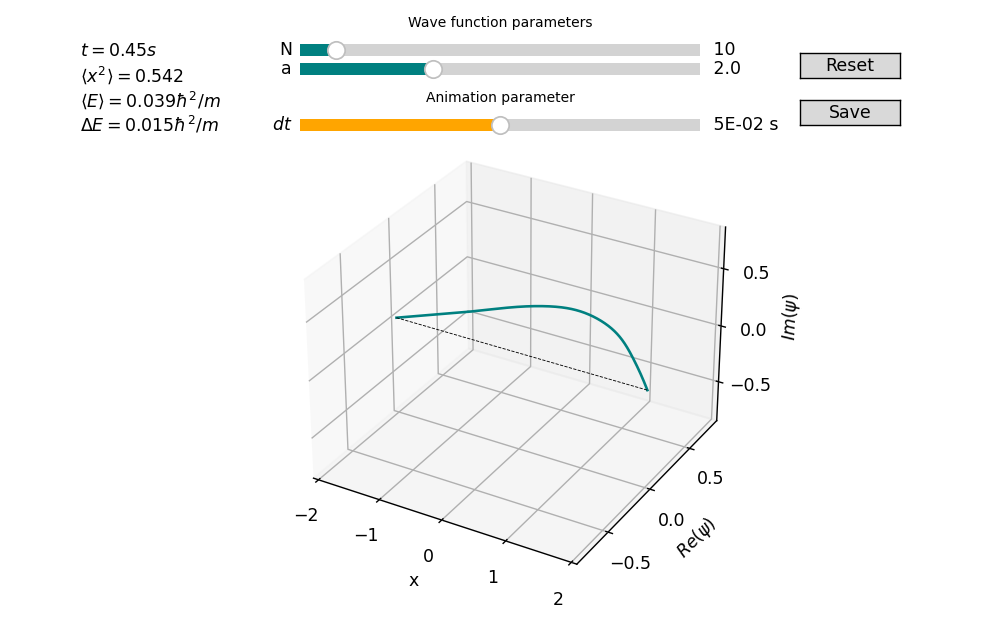

In [3]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

#We enable the interactive mode for the next graphic
%matplotlib notebook


# -----------------------------------------------------------------------------------------------

def find_lims_abs(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of the imaginary and real part of Y (wavefunction array)
    ymax = np.max(Y)
    ymin = -ymax
    lim_inf, lim_sup = ymin*1.2, ymax*1.2

    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def animate_interactive_Psi_3D(Psi,t0,total_frames):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have n,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------

    #We define some wrapped functions to have a better program structure 
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_N = fig.add_axes([0.3, 0.90, 0.4, 0.04])
        ax_N.set_title('Wave function parameters',fontsize=8)
        ax_a = fig.add_axes([0.3, 0.87, 0.4, 0.04])
        
        ax_dt = fig.add_axes([0.3, 0.78, 0.4, 0.04])
        ax_dt.set_title('Animation parameter',fontsize=8)
        
        #We create the sliders as widgets
        s_N = Slider(ax=ax_N, label='N', valmin=1, valmax=100, valinit=N, valstep = 1, valfmt=' %0.0f',facecolor='teal')
        s_a = Slider(ax=ax_a, label='a', valmin=0.5, valmax=5, valinit=a, valfmt=' %1.1f ', facecolor='teal')
        s_dt = Slider(ax=ax_dt,label='$dt$',valmin=0.0001,valmax=0.1,valinit=dt,valfmt=' %.E s',facecolor='orange')    
        
        #We return all axes and sliders created in the function
        return ax_N, ax_a, ax_dt, s_N, s_a, s_dt
    
    def make_annotations(actualize=False):
    #This function defines and specifies the details of the annotations needed in this interactive plot
    #Any details referring the definition and graphic details of the annotations must be changed inside this function

    #We define the annotations as global in order to be able to define and actualize the annotations in the same function.
        global time_annotation, x2_annotation, E_annotation, DE_annotation
        
        E = sum( (2*15**(1/2)/pi**3*(2-2*cos(n*pi)-n*pi*sin(pi*n))/n**3)**2 * (n*pi/(8*a))**2 for n in range(1,N+1))
        DE = np.sqrt(sum( (2*15**(1/2)/pi**3*(2-2*cos(n*pi)-n*pi*sin(pi*n))/n**3)**2 * (n*pi/(8*a))**4 for n in range(1,N+1)) - E**2)
        
        X = np.linspace(x0,xf,1000)
        x2 = sum(X**2*np.abs(Psi(X,t))**2)*(X[1]-X[0])
        
        if (actualize==False):
            time_annotation = ax.annotate("$t = {:10.3f} s $".format(t), xy=(0.08, 0.91), xycoords="figure fraction")
            x2_annotation=ax.annotate("$⟨x^2⟩ = {:10.3f} $".format(x2), xy=(0.08, 0.87), xycoords="figure fraction")
            E_annotation = ax.annotate("$⟨E⟩ = {:10.3f} ħ^2/m $".format(E), xy=(0.08, 0.83), xycoords="figure fraction")
            DE_annotation = ax.annotate("$ΔE = {:10.3f} ħ^2/m $".format(DE), xy=(0.08, 0.79), xycoords="figure fraction")
        if (actualize==True):
            E_annotation.set_text("$⟨E⟩ = {:10.3f} ħ^2/m $".format(E))
            DE_annotation.set_text("$ΔE = {:10.3f} ħ^2/m $".format(DE))
        
        #We return all annotations created in the function
        return time_annotation, x2_annotation, E_annotation, DE_annotation
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.8,0.875,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')
        
        def reset(event):
        #Resets all sliders and time
            global t
            t = t0
            s_N.reset()
            s_a.reset()
            s_dt.reset()
            ax.view_init()
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.8,0.80,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            anim.save('Parabolic_wavefun_animated_rhox.gif',PillowWriter(fps=20),dpi=100)
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_save
        
    def initialize_anim():
#   Function used to initialize the animation figure (Format and graphic details)
#       We restart the time
        global t
        t = t0

#       We add some graphic details
        ax.set_xlabel('x')
        ax.set_ylabel('$Re(ψ)$')
        ax.set_zlabel('$Im(ψ)$')
        
#       We compute the initial information
        X = np.linspace(x0,xf,2000)
        ymin,ymax = find_lims_abs(np.abs(Psi(X,t0)))
        
#       We use the initial function limits
        ax.set_xlim3d(x0, xf)
        ax.set_ylim3d(ymin,ymax)
        ax.set_zlim3d(ymin,ymax)
        
        #We return the axis line
        return line0, line,
    

    def animate(frame_num):
#   Function we iterate to generate each frame
#       We compute all needed variables each frame and actualize the line
        global t, X, Y
        t = t + dt
        
#       We actualize the function's information
        X = np.linspace(x0,xf,2000)
        Y = np.real(Psi(X,t))
        Z = np.imag(Psi(X,t))

        line.set_data(X, Y)
        line.set_3d_properties(Z)

#       We add a line at (x,0,0) to better visualize the complex axis
        line0.set_data([x0,xf],[0,0])
        line0.set_3d_properties([0,0])
        
#       We actualize the needed annotations
        time_annotation.set_text("$t = {:10.2f} s $".format(t))
        x2 = sum(X**2*np.abs(Psi(X,t))**2)*(X[1]-X[0])        
        x2_annotation.set_text("$⟨x^2⟩ = {:10.3f} $".format(x2))
        
        #We return all line functions
        return line0, line,
    
    
    def update(val):
    #Function used to update the figure when sliders are used
        #We update each global parameter in the wave function
        global N,k,a,x0,xf,ymin,ymax,dt
        N = round(s_N.val)
        a = s_a.val
        dt = s_dt.val
        
        x0 = -a
        xf = a
        
        #We compute and apply the new limits in the main figure
        X = np.linspace(x0,xf,2000)
        ymin, ymax = find_lims_abs(np.abs(Psi(X,t0)))
        
        ax.set_xlim3d(x0, xf)
        ax.set_ylim3d(ymin,ymax)
        ax.set_zlim3d(ymin,ymax)
        
        #We actualize the annotations
        time_annotation, x2_annotation, E_annotation, DE_annotation = make_annotations(actualize=True)
        
        plt.show()
        return
    
    
        # ------------------------------------------------------------
    
    #Function's Main Program
    #We initialize wave function's variables
    global N,a,x0,xf,t,dt
    N = 10
    a = 2

    #We initialize figure's variables
    t = t0
    dt = 0.05
    x0 = -a
    xf = a
    
    #We define figure's axes and main line
    fig = plt.figure(figsize=(8,5),dpi=100)
    fig.subplots_adjust(bottom = 0.05, top = 0.80)
    ax = fig.add_subplot(111,projection='3d')

    line, = ax.plot([], [], [], lw=1.5, color = 'teal')
    line0, = ax.plot([], [], [], 'k--', lw=0.5)
    
    #We avoid too many ticks at the axes
    plt.locator_params(nbins=5)
        
    #We create the animation with preset parameters
    anim = FuncAnimation(fig, animate, init_func=initialize_anim, frames = total_frames, interval = 50, blit=True)
    
    #We create the desired sliders
    ax_N, ax_a, ax_dt, s_N, s_a, s_dt = create_sliders()
    
    #We generate the two buttons
    b_reset, b_save = generate_buttons()   
    
    #We generate the annotations
    time_annotation, x2_annotation, E_annotation, DE_annotation = make_annotations()
    
    #We call the update function when any slider is used
    s_N.on_changed(update)
    s_a.on_changed(update)
    s_dt.on_changed(update)
    
    plt.show()
    #Although it might seem redundant to return the animation and buttons after showing them, referencing them 
    #  in the main program is needed for the interactive plot to work properly
    return anim, b_reset, b_save


# -----------------------------------------------------------------------------------------------

#We define the initial time and number of total frames
#A high total_frames value is discouraged if saving the animation is intended 
t0 = 0
total_frames = 300

anim, b_reset, b_save = animate_interactive_Psi_3D(Psi1,t0,total_frames)